## Read data with a time index
pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.

In this exercise, you will read data from a CSV file called `climate_change`.csv that contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016. You will use pandas' `read_csv` function.

To designate the index as a `DateTimeIndex`, you will use the `parse_dates` and `index_col` key-word arguments both to parse this column as a variable that contains dates and also to designate it as the index for this DataFrame.
```
Instructions
```
+ Import the pandas library as pd.
+ Read in the data from a CSV file called `'climate_change.csv'` using `pd.read_csv`.
+ Use the `parse_dates` key-word argument to parse the `"date"` column as dates.
+ Use the `index_col` key-word argument to set the `"date"` column as the index.


In [1]:
# Import pandas as pd
import pandas as pd
# Import matplotlib as plt
import matplotlib.pyplot as plt

# Read the data from file using read_csv
climate_change = pd.read_csv('./dataset/climate_change.csv', parse_dates=["date"],index_col='date')

## **Defining a function that plots time-series data**
Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.
```
Instructions
```
+ Define a function called `plot_timeseries` that takes as input an Axes object (`axes`), data (`x`,`y`), a string with the name of a color and strings for x- and y-axis labels.
+ Plot y as a function of in the color provided as the input `color`.
+ Set the x- and y-axis labels using the provided input `xlabel` and `ylabel`, setting the y-axis label color using `color`.
+ Set the y-axis tick parameters using the `tick_params` method of the Axes object, setting the `colors` key-word to `color`.

In [2]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

## annotation simple
**simple `annotation` arguments**

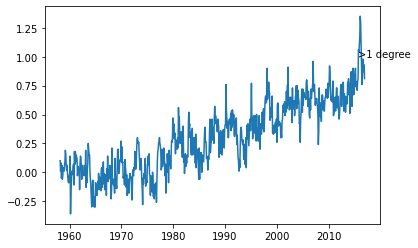

In [3]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index,climate_change["relative_temp"])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

## Plotting time-series: putting it all together
In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is provided as a DataFrame called `climate_change`. You should also use the function that we have defined before, called `plot_timeseries`, which takes an Axes object (as the `axes` argument) plots a time-series (provided as `x` and `y` arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:
        
        plot_timeseries(axes, x, y, color, xlabel, ylabel)
    
Then, you will annotate with text an important time-point in the data: on 2015-10-06, when the temperature first rose to above 1 degree over the average.

```
Instructions
```
+ Use the `plot_timeseries` function to plot CO2 levels against time. Set xlabel to `"Time (years)"` ylabel to `"CO2 levels"` and color to `'blue'`.
+ Create `ax2`, as a twin of the first Axes.
+ In `ax2`, plot temperature against time, setting the color ylabel to `"Relative temp (Celsius)"` and color to `'red'`.
+ Annotate the data using the `ax2.annotate` method. Place the text `">1 degree"` in `x=pd.Timestamp('2008-10-06')`, y=`-0.2` pointing with a gray thin arrow to `x=pd.Timestamp('2015-10-06')`, y = `1`.

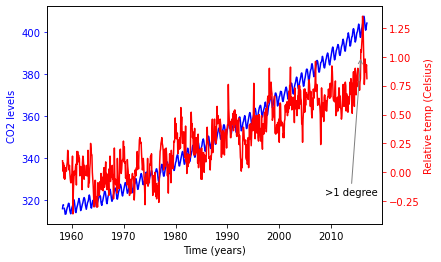

In [4]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06 00:00:00'),1), xytext=(pd.Timestamp('2008-10-06 00:00:00'),-0.2), arrowprops={"arrowstyle":"->", "color": "gray"})

plt.show()